**Importing time-series data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load time series dataset
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power.columns


Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Clearly we have records of all type of power consumption by 2017.

In [ ]:
df_power.shape


(4383, 5)

In [ ]:
df_power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [ ]:
#convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [ ]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [ ]:
df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [ ]:
df_power.index


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name

In [ ]:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [ ]:
df_power.loc['2015-10-02']

Consumption                                               1391.05
Wind                                                       81.229
Solar                                                     160.641
Wind+Solar                                                 241.87
Year                                                         2015
Month                                                          10
Weekday Name    <bound method _inherit_from_data.<locals>.meth...
Name: 2015-10-02 00:00:00, dtype: object

In [ ]:
df_power.loc['2017-01-01':'2017-01-10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.413,307.125,35.291,342.416,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-02,1441.052,295.099,12.479,307.578,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-03,1529.990,666.173,9.351,675.524,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-04,1553.083,686.578,12.814,699.392,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-05,1547.238,261.758,20.797,282.555,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-06,1501.795,115.723,33.341,149.064,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-07,1405.145,252.307,8.387,260.694,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-08,1301.011,41.261,4.991,46.252,2017,1,<bound method _inherit_from_data.<locals>.meth...
2017-01-09,1604.348,190.983,7.070,198.053,2017,1,<bound method _inherit_from_data.<locals>.meth...


**Visualization for time series analysis**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the pandas's plot() method.

<Axes: xlabel='Date'>

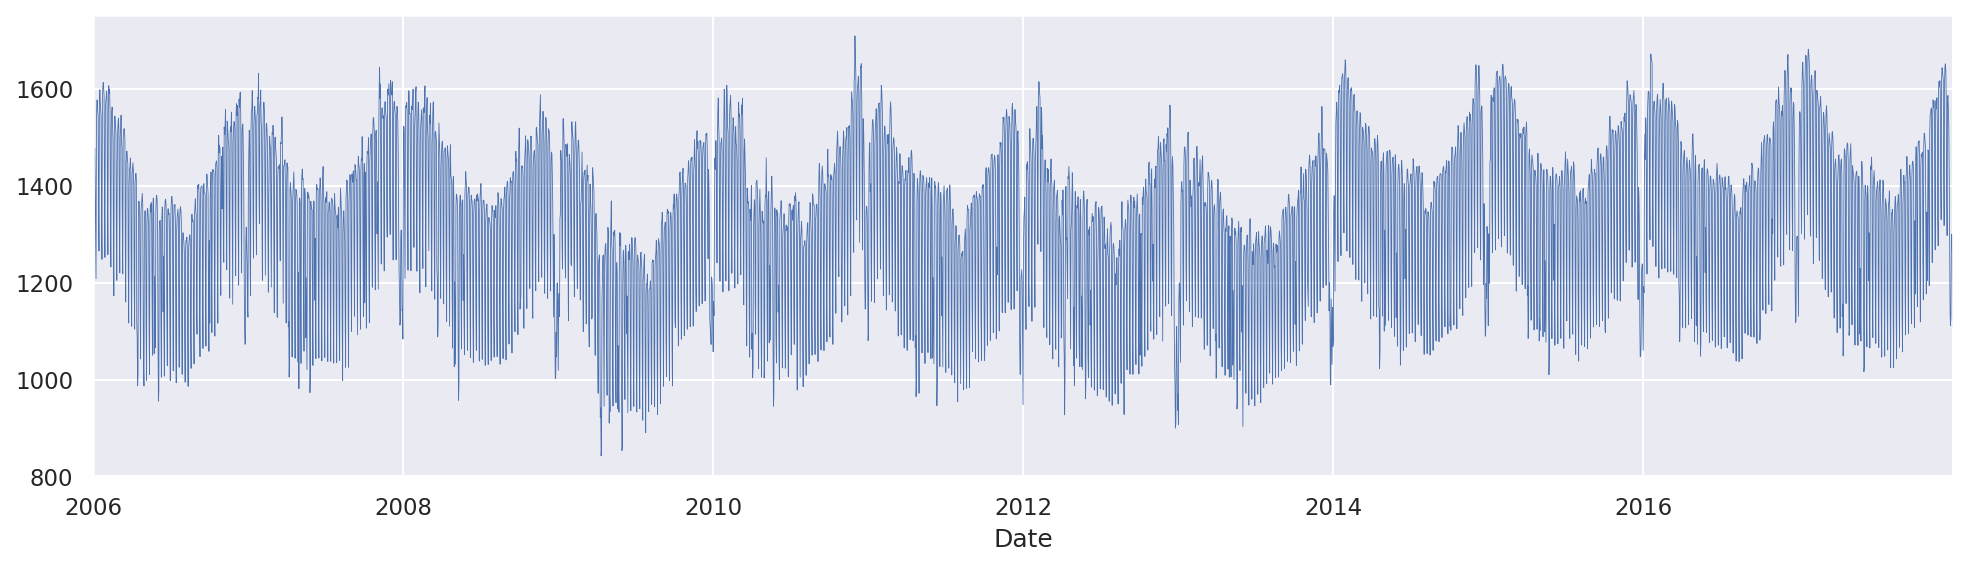

In [ ]:
df_power['Consumption'].plot(linewidth=0.4)

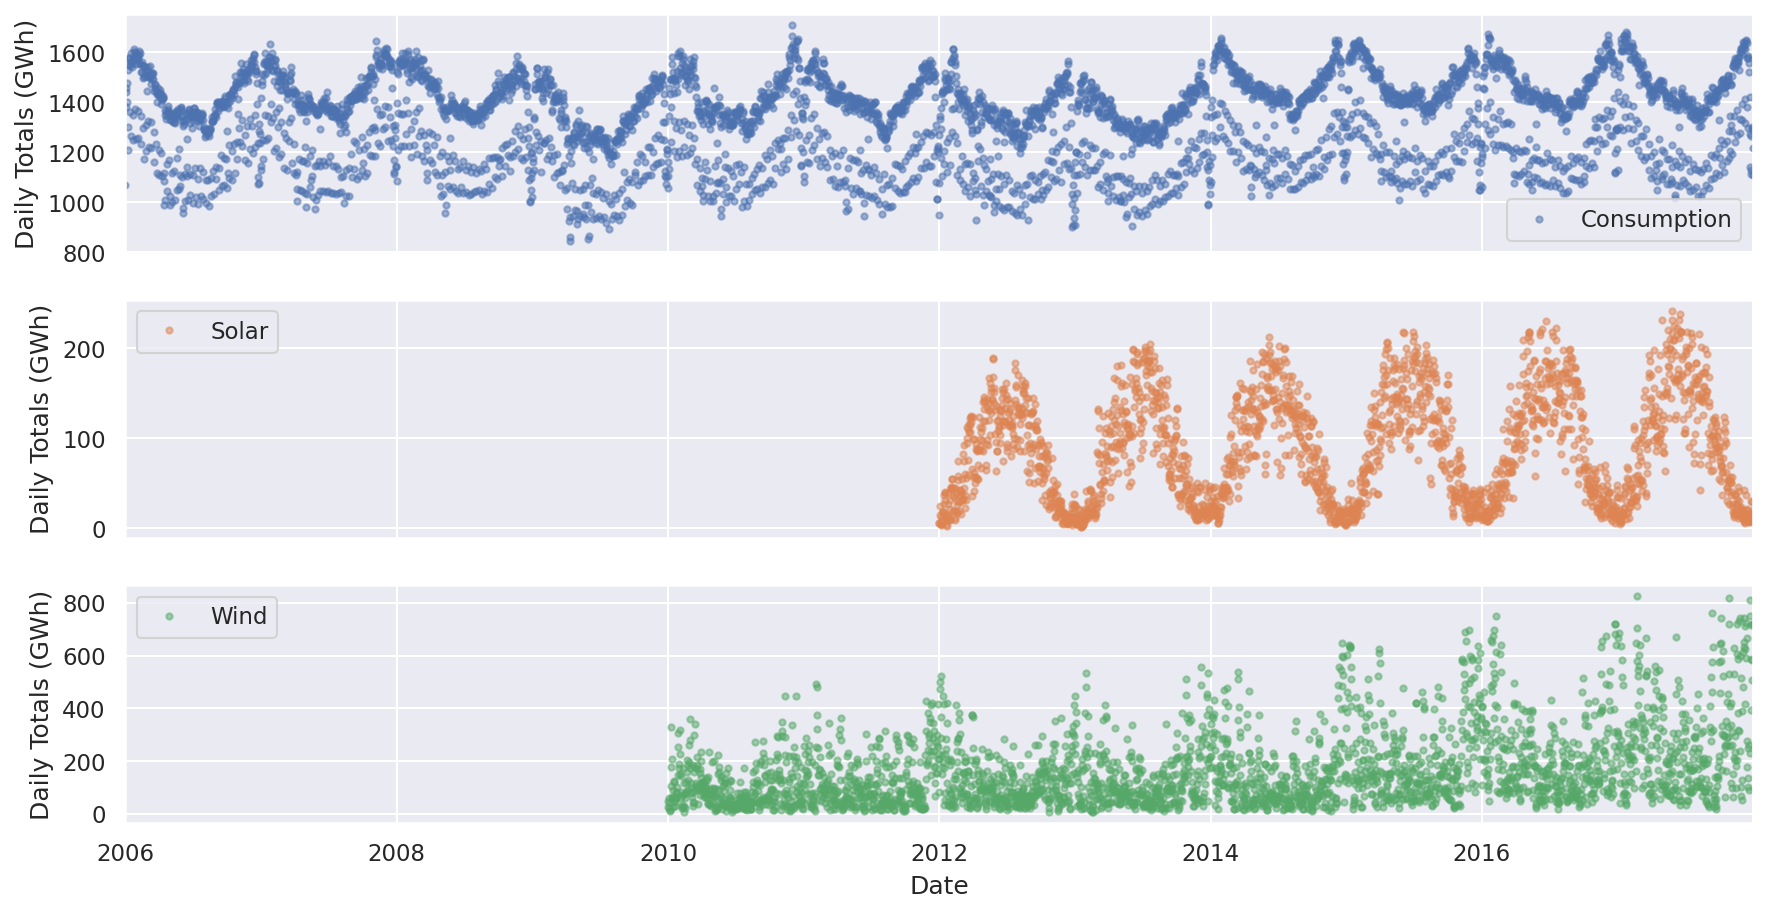

In [ ]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

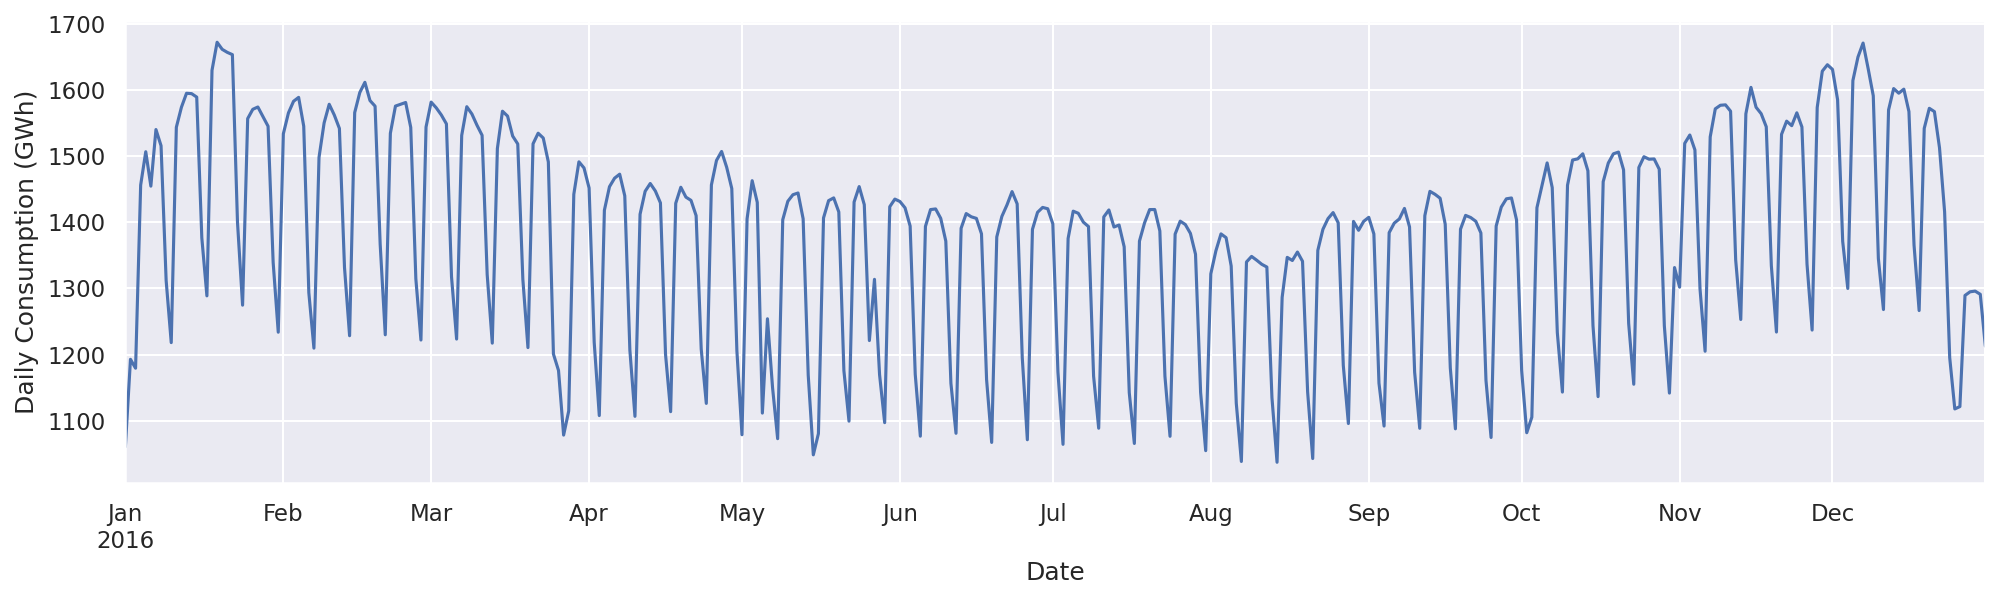

In [ ]:
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');


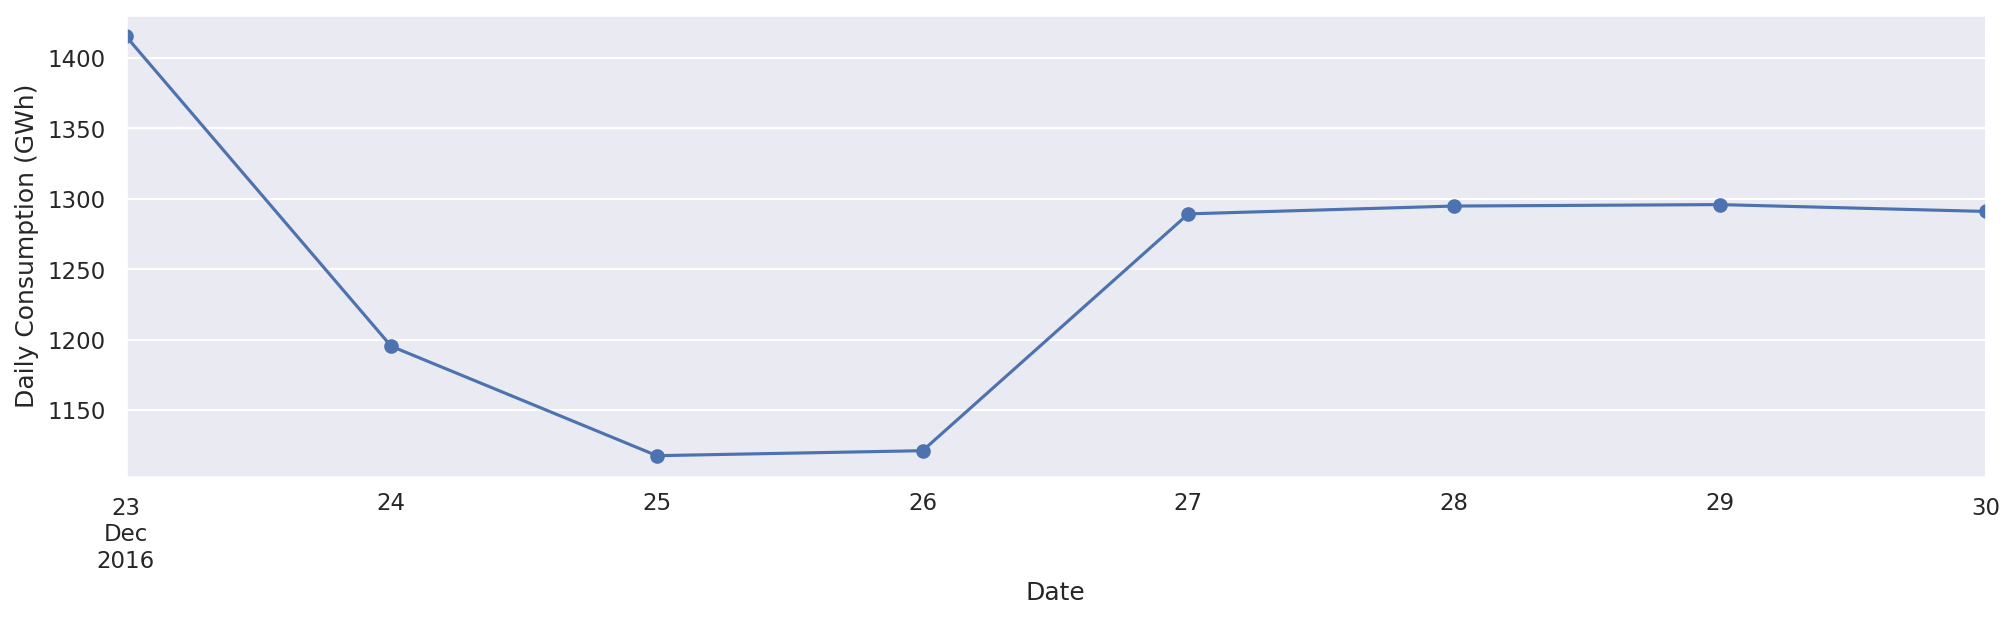

In [ ]:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


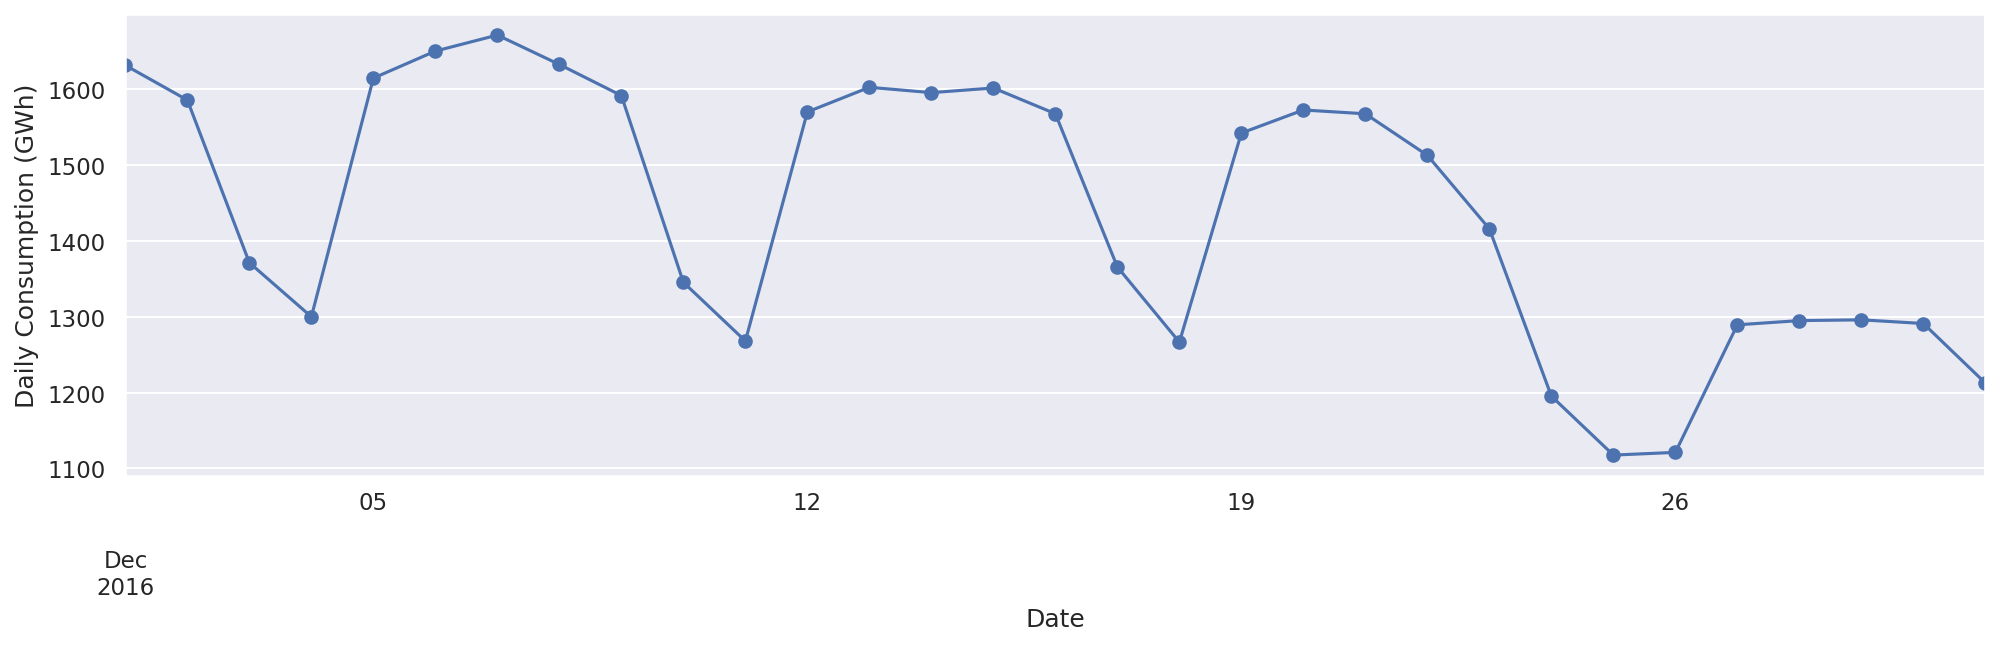

In [ ]:
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


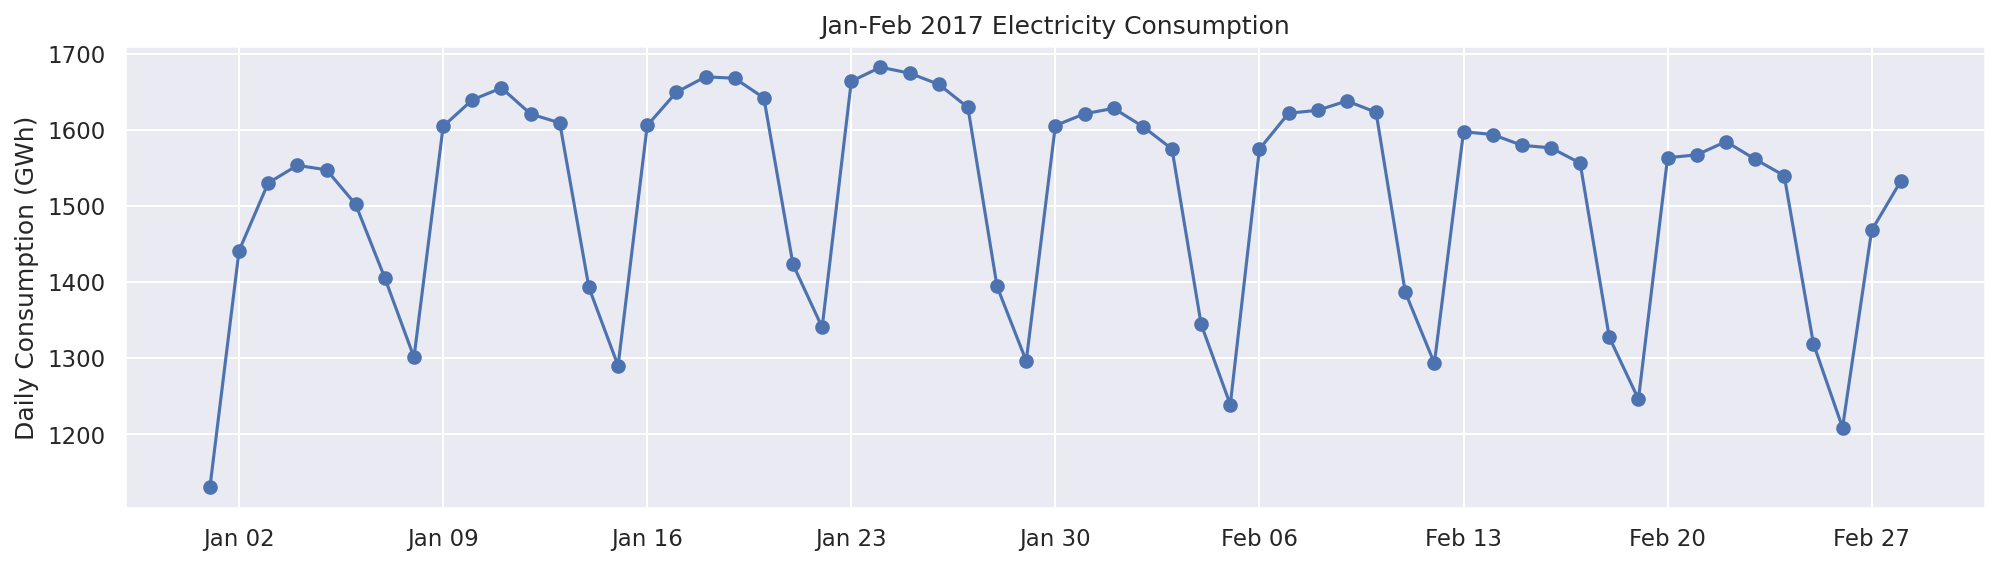

In [ ]:

# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

**Seasonality**

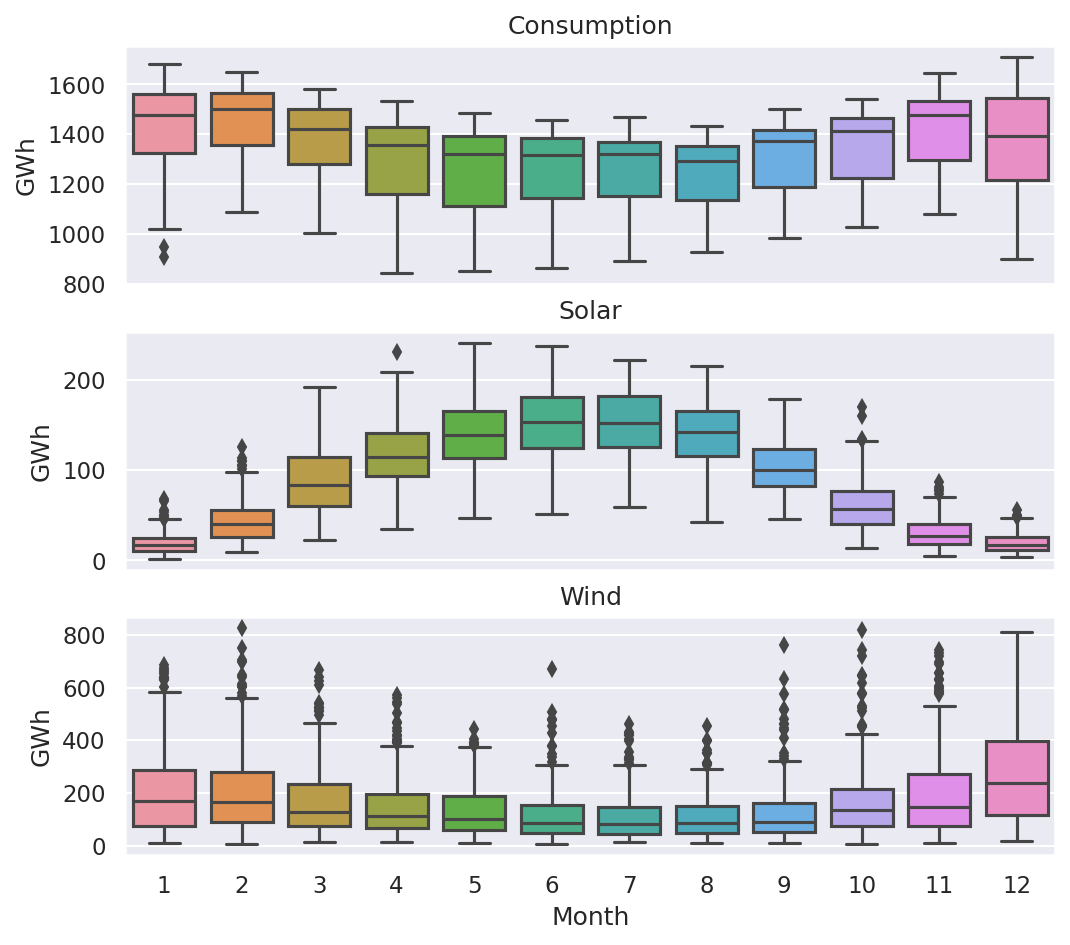

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  


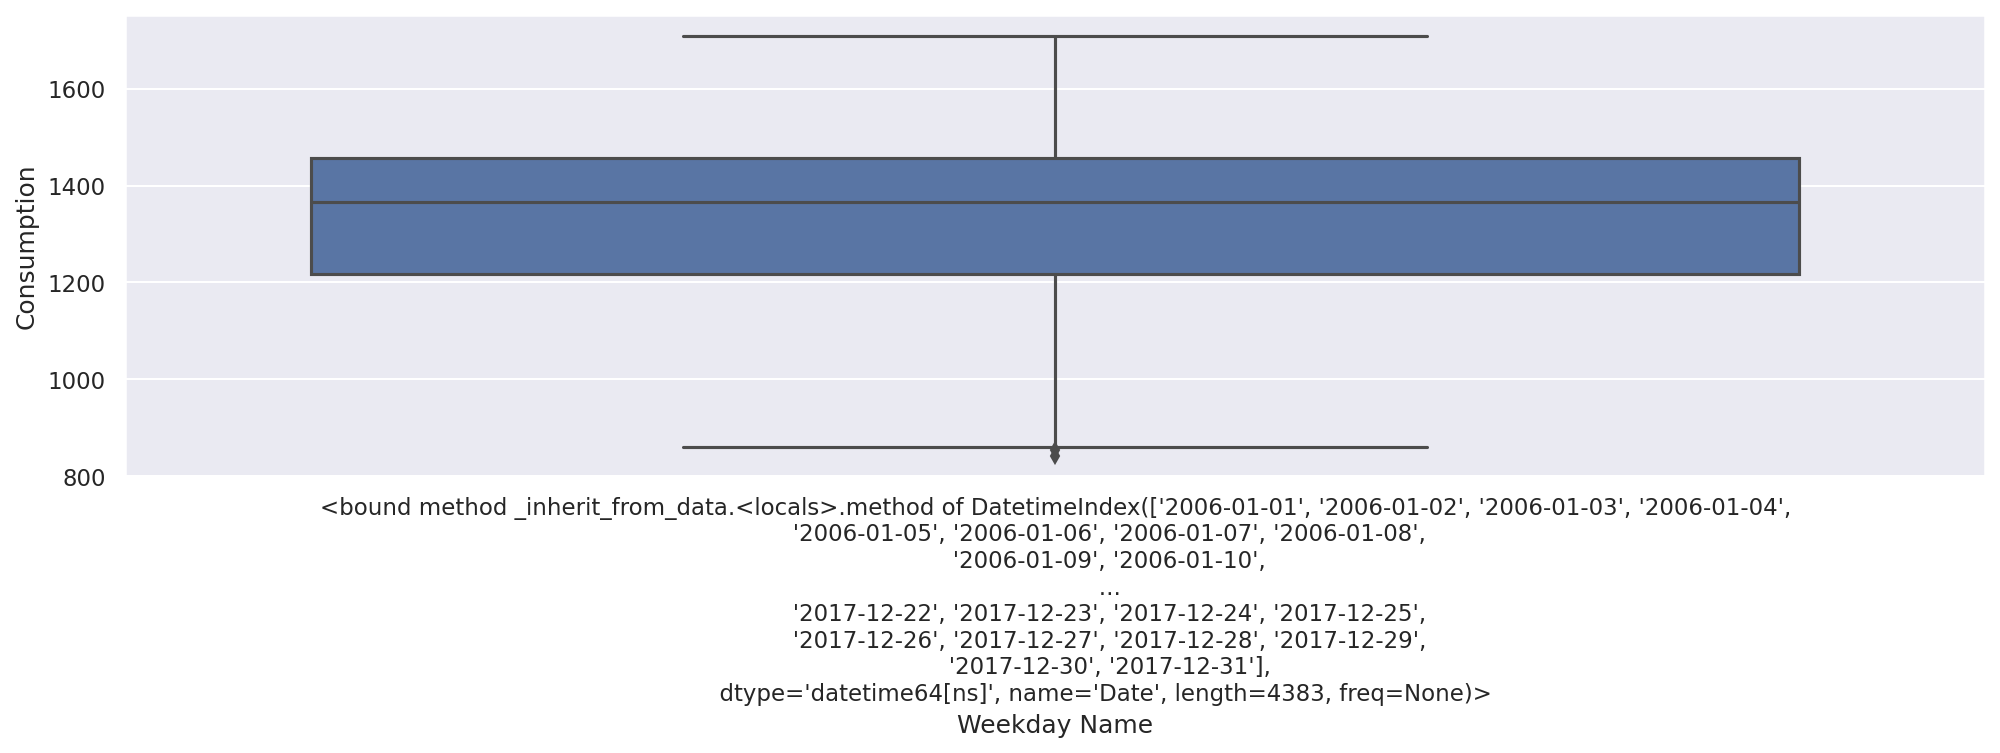

In [ ]:
sns.boxplot(data=df_power, x='Weekday Name', y='Consumption');


In [ ]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


In [ ]:
start, end = '2016-01', '2016-06'


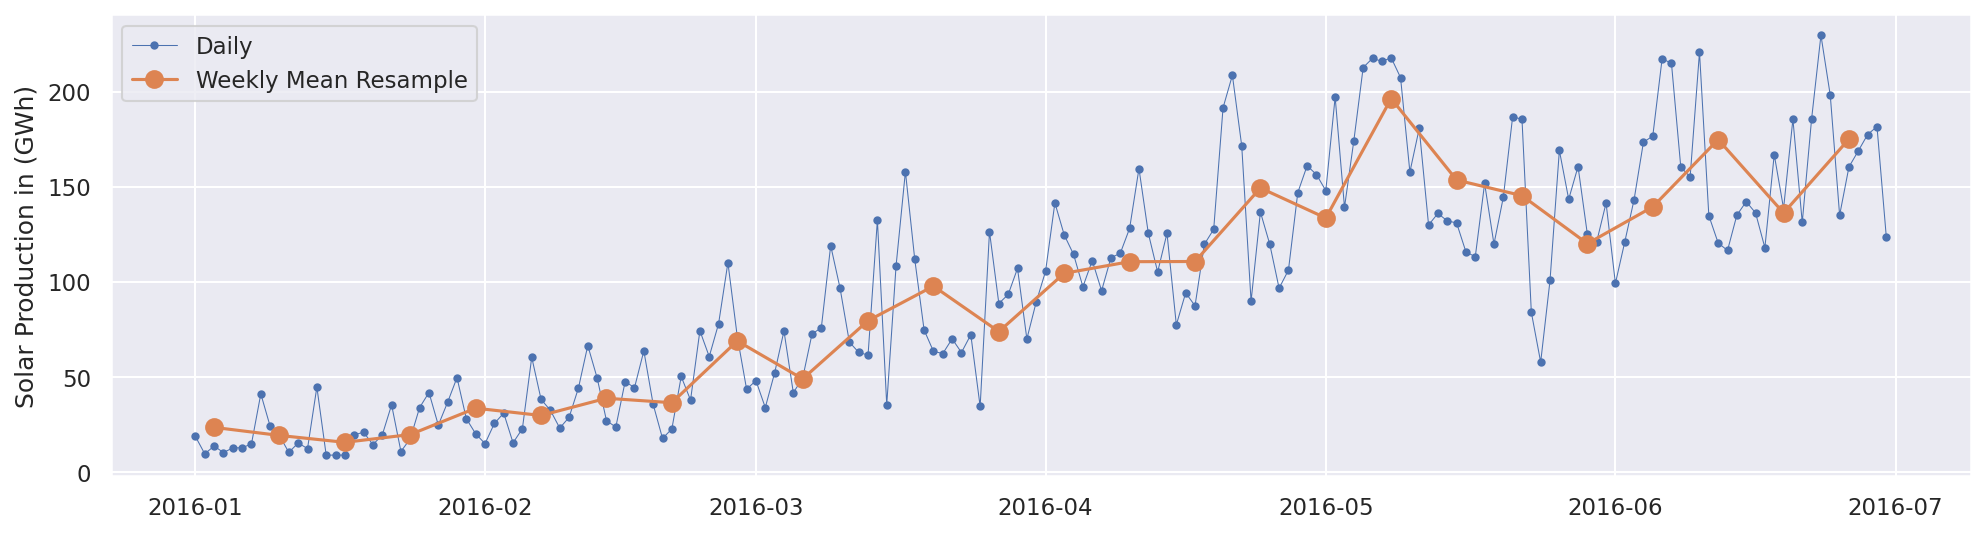

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();